## Importing Libraries

In [32]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

## Importing Data

### Setup Working Directory [Discarded]

In [33]:
# #read the path
# file_path = ""

### Filtering Parquet Files from WD

In [34]:
#select parquet files only
par_files = glob.glob('nyc_green_taxi_parquet_format/*.{}'.format('parquet'))

In [35]:
# trips = pd.read_parquet('nyc_green_taxi_parquet_format/green_tripdata_2018-01.parquet', engine='pyarrow')
trips = pd.concat([pd.read_parquet(f,engine='pyarrow') for f in par_files ], ignore_index=True)
locations = pd.read_csv('taxi_zone.csv')

## Data Verification using basic Analysis

In [36]:
trips.shape

(8899718, 20)

In [37]:
trips.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

In [38]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8899718 entries, 0 to 8899717
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   lpep_pickup_datetime   datetime64[ns]
 2   lpep_dropoff_datetime  datetime64[ns]
 3   store_and_fwd_flag     object        
 4   RatecodeID             float64       
 5   PULocationID           int64         
 6   DOLocationID           int64         
 7   passenger_count        float64       
 8   trip_distance          float64       
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  ehail_fee              object        
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  payment_type           float64       
 18  trip_type             

### Check Anomalies using 

In [39]:
null_values_count = trips.isna().sum()
empty_Cols = {}
empty_percentage = 95
for column,data in null_values_count.iteritems():
    null_pc = (data/len(trips)) * 100
    if null_pc > empty_percentage :
        empty_Cols[column] = null_pc
        trips = trips.drop([column], axis=1)

print ("Below Fields are more than "+ str(empty_percentage) + "% Empty and Automatically Removed")
print(empty_Cols)
print("Updated Data")
trips.head()

Below Fields are more than 95% Empty and Automatically Removed
{'ehail_fee': 99.99061768024559, 'congestion_surcharge': 100.0}
Updated Data


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2018-10-01 00:05:48,2018-10-01 00:21:49,N,1.0,255,97,2.0,4.37,16.0,0.5,0.5,0.0,0.0,0.3,17.3,2.0,1.0
1,2,2018-10-01 00:24:19,2018-10-01 00:31:50,N,1.0,97,49,2.0,1.45,7.0,0.5,0.5,0.0,0.0,0.3,8.3,2.0,1.0
2,2,2018-10-01 00:12:06,2018-10-01 00:21:15,N,1.0,25,181,1.0,2.04,9.0,0.5,0.5,1.5,0.0,0.3,11.8,1.0,1.0
3,2,2018-10-01 00:34:42,2018-10-01 00:39:23,N,1.0,25,40,1.0,0.91,5.0,0.5,0.5,0.0,0.0,0.3,6.3,2.0,1.0
4,2,2018-10-01 00:50:21,2018-10-01 01:01:28,N,1.0,25,257,1.0,3.53,12.5,0.5,0.5,0.0,0.0,0.3,13.8,2.0,1.0


In [40]:
trips.head(-1)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2018-10-01 00:05:48,2018-10-01 00:21:49,N,1.0,255,97,2.0,4.37,16.0,0.5,0.5,0.00,0.0,0.3,17.30,2.0,1.0
1,2,2018-10-01 00:24:19,2018-10-01 00:31:50,N,1.0,97,49,2.0,1.45,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2.0,1.0
2,2,2018-10-01 00:12:06,2018-10-01 00:21:15,N,1.0,25,181,1.0,2.04,9.0,0.5,0.5,1.50,0.0,0.3,11.80,1.0,1.0
3,2,2018-10-01 00:34:42,2018-10-01 00:39:23,N,1.0,25,40,1.0,0.91,5.0,0.5,0.5,0.00,0.0,0.3,6.30,2.0,1.0
4,2,2018-10-01 00:50:21,2018-10-01 01:01:28,N,1.0,25,257,1.0,3.53,12.5,0.5,0.5,0.00,0.0,0.3,13.80,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8899712,1,2018-05-31 23:34:16,2018-05-31 23:38:40,N,1.0,74,41,1.0,1.20,5.5,0.5,0.5,0.00,0.0,0.3,6.80,2.0,1.0
8899713,1,2018-05-31 23:41:41,2018-05-31 23:45:57,N,1.0,41,42,1.0,1.40,6.0,0.5,0.5,1.45,0.0,0.3,8.75,1.0,1.0
8899714,2,2018-05-31 23:55:23,2018-06-01 00:01:11,N,1.0,25,181,1.0,1.28,6.5,0.5,0.5,1.56,0.0,0.3,9.36,1.0,1.0
8899715,2,2018-05-31 23:53:48,2018-05-31 23:59:53,N,1.0,74,24,1.0,1.67,7.5,0.5,0.5,1.76,0.0,0.3,10.56,1.0,1.0


In [41]:
trips.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
count,8.899718e+06,8.798641e+06,8.899718e+06,8.899718e+06,8.798641e+06,8.899718e+06,8.899718e+06,8.899718e+06,8.899718e+06,8.899718e+06,8.899718e+06,8.899718e+06,8.899718e+06,8.798641e+06,8.797743e+06
mean,1.840284e+00,1.114561e+00,1.108305e+02,1.287681e+02,1.350911e+00,3.252301e+00,1.374802e+01,3.560283e-01,4.890977e-01,1.004409e+00,1.840954e-01,2.867707e-01,1.609376e+01,1.440722e+00,1.027873e+00
std,3.663905e-01,7.112441e-01,7.408927e+01,7.675273e+01,1.030820e+00,4.582039e+00,1.303500e+01,4.861849e-01,8.616116e-02,1.994808e+00,1.212403e+00,6.513242e-02,1.407958e+01,5.189033e-01,1.646097e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-5.000000e+02,-2.542000e+01,-5.000000e-01,-1.000000e+02,-1.500000e+01,-3.000000e-01,-5.000000e+02,1.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,4.900000e+01,6.200000e+01,1.000000e+00,1.070000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00,1.000000e+00,1.000000e+00
50%,2.000000e+00,1.000000e+00,8.200000e+01,1.290000e+02,1.000000e+00,1.930000e+00,1.000000e+01,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.180000e+01,1.000000e+00,1.000000e+00
75%,2.000000e+00,1.000000e+00,1.660000e+02,1.930000e+02,1.000000e+00,3.900000e+00,1.650000e+01,5.000000e-01,5.000000e-01,1.660000e+00,0.000000e+00,3.000000e-01,1.910000e+01,2.000000e+00,1.000000e+00
max,5.000000e+00,9.900000e+01,2.650000e+02,2.650000e+02,9.000000e+00,8.005680e+03,1.044584e+04,1.100000e+01,8.291000e+01,4.855500e+02,7.655400e+02,3.000000e-01,1.052875e+04,5.000000e+00,2.000000e+00


In [42]:
trips['VendorID'].value_counts()

2    7478185
1    1421507
5         26
Name: VendorID, dtype: int64

In [43]:
trips['payment_type'].value_counts()

1.0    5000865
2.0    3737631
3.0      40684
4.0      19086
5.0        375
Name: payment_type, dtype: int64

Text(0, 0.5, 'Count')

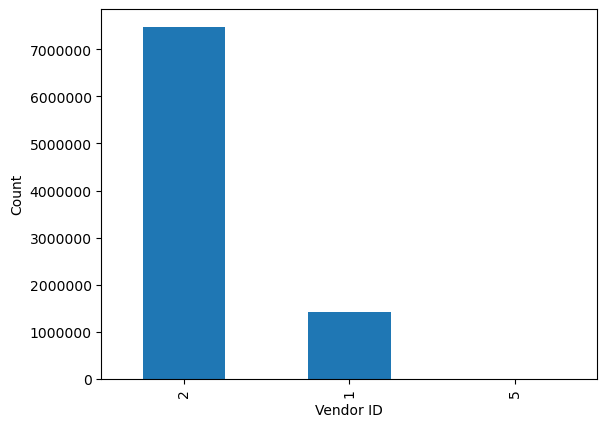

In [44]:
plot= trips['VendorID'].value_counts().plot(kind='bar')
plot.ticklabel_format(style='plain', axis='y') # to aviod value count in scienctific notation
plot.set_xlabel("Vendor ID")
plot.set_ylabel("Count")

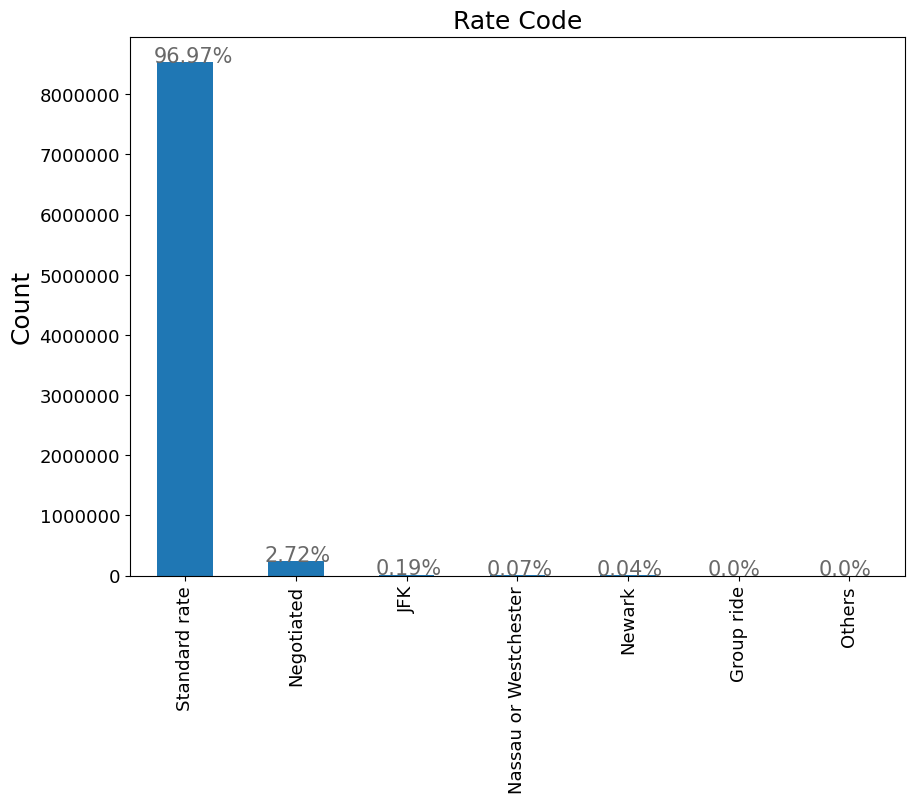

In [45]:
dict_map = {1: 'Standard rate' , 2: 'JFK'  ,3 :'Newark' , 4 : 'Nassau or Westchester' , 5:'Negotiated' , 6: 'Group ride' , 99 :'Others'}
ax = trips['RatecodeID'].map(dict_map).value_counts().plot(kind='bar', figsize=(10,7),
                                       fontsize=13);
ax.set_title("Rate Code", fontsize=18)
ax.set_ylabel("Count", fontsize=18);
ax.ticklabel_format(style='plain', axis='y')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='dimgrey')

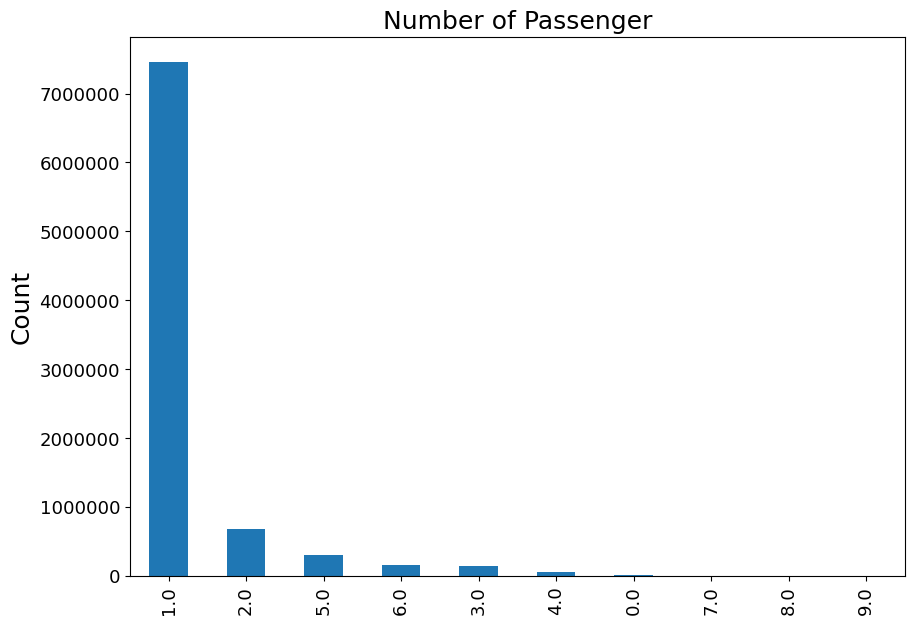

In [46]:
ax = trips['passenger_count'].value_counts().plot(kind='bar', figsize=(10,7),
                                       fontsize=13)
ax.set_title("Number of Passenger", fontsize=18)
ax.set_ylabel("Count", fontsize=18);
ax.ticklabel_format(style='plain', axis='y')

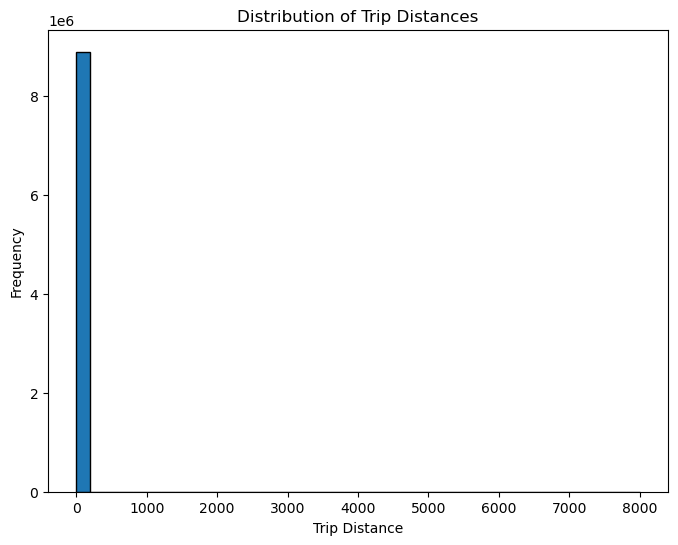

In [47]:
plt.figure(figsize=(8, 6))
plt.hist(trips['trip_distance'], bins=40, edgecolor='black')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Distances')
plt.show()

## Clean Up and Validations

In [48]:
Payment_Feilds = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge']
trips['TotalFareAmount'] = trips[Payment_Feilds].sum(axis=1)
trips['Match'] = trips['TotalFareAmount'] == trips['total_amount']
filtered_df = trips[trips['Match'] == False]
not_matching = (trips['Match'].value_counts()/len(trips))*100
not_matching = '{:.1f}'.format(not_matching[0])
print ("Out of " + str(len(trips)) + " Trips "+ str(not_matching[0]) + " % of Total Ammount does not match with Calculation")

Out of 8899718 Trips 9 % of Total Ammount does not match with Calculation


In [49]:
# Convert negative fares feilds to positive values using absolute function
trips['total_amount'] = trips['total_amount'].abs()
trips['TotalFareAmount'] = trips['TotalFareAmount'].abs()
trips['fare_amount'] = trips['fare_amount'].abs()
trips['extra'] = trips['extra'].abs()
trips['mta_tax'] = trips['mta_tax'].abs()
trips['tip_amount'] = trips['tip_amount'].abs()
trips['tolls_amount'] = trips['tolls_amount'].abs()
trips['improvement_surcharge'] = trips['improvement_surcharge'].abs()

In [50]:
trips['store_and_fwd_flag'].value_counts()

N    8781950
Y      16691
Name: store_and_fwd_flag, dtype: int64

## Calculated/Merged Columns 

In [51]:
trips['Pickup_Day'] = trips['lpep_pickup_datetime'].dt.strftime('%a')  # First three letters of the day
trips['Hour_of_day'] = trips['lpep_pickup_datetime'].dt.hour  # Extract hour from datetime

In [52]:
#Merge Location data with Trips Data to avoid Operation in Visualization
locations = locations.rename(columns={'LocationID': 'PULocationID'})
trips = pd.merge(trips, locations, on='PULocationID', how='left')

In [53]:
trips['service_zone'].value_counts()

Boro Zone      8741748
Yellow Zone     143113
Airports          2197
EWR                105
Name: service_zone, dtype: int64

In [54]:
def airport_or_non_airport(zone):
    if zone == 'Airports' :
        return 'Airport'
    else:
        return 'Non-Airport'

trips['Airport/Non-Airport'] = trips['service_zone'].apply(airport_or_non_airport)


## EDA using Plots

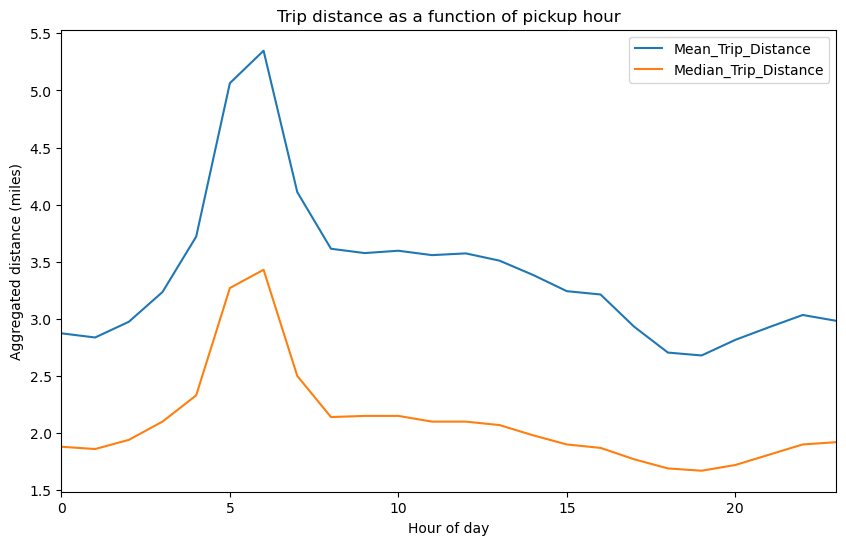

Trip distance grouped by hour of the day: 

 Hour_of_day  Mean_Trip_Distance  Median_Trip_Distance
           0            2.873162                  1.88
           1            2.836800                  1.86
           2            2.974082                  1.94
           3            3.234919                  2.10
           4            3.720199                  2.33
           5            5.064270                  3.27
           6            5.348098                  3.43
           7            4.110020                  2.50
           8            3.613862                  2.14
           9            3.576025                  2.15
          10            3.596486                  2.15
          11            3.557976                  2.10
          12            3.573217                  2.10
          13            3.509829                  2.07
          14            3.384130                  1.98
          15            3.242406                  1.90
          16         

In [55]:
# Pivot table method of dataframe to get aggregation of Trip distance by hour.
Aggregation_Chart = trips.pivot_table(
    index="Hour_of_day", values="trip_distance", aggfunc=("mean", "median")
).reset_index()

figure, axes = plt.subplots(figsize=(10, 6))
Aggregation_Chart.columns = [
    "Hour_of_day",
    "Mean_Trip_Distance",
    "Median_Trip_Distance",
]

Aggregation_Chart[["Mean_Trip_Distance", "Median_Trip_Distance"]].plot(ax=axes)
plt.ylabel("Aggregated distance (miles)")
plt.xlabel("Hour of day")
plt.title("Trip distance as a function of pickup hour")
plt.xlim([0, 23])
plt.show()
print("Trip distance grouped by hour of the day: \n")

print(Aggregation_Chart.to_string(index=False))

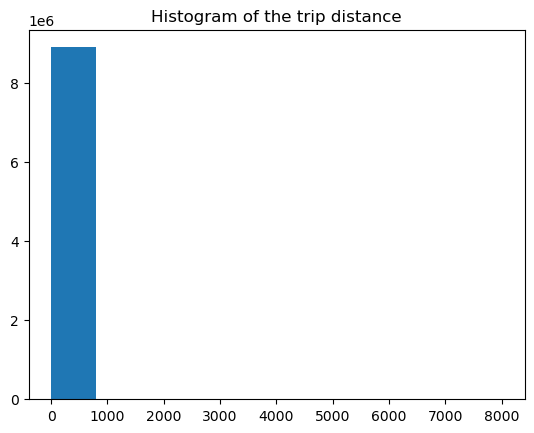

In [56]:
plt.hist(trips["trip_distance"])
plt.title('Histogram of the trip distance')
plt.show()

/Users/pareekkarishamagmail.com/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trip_distance'>

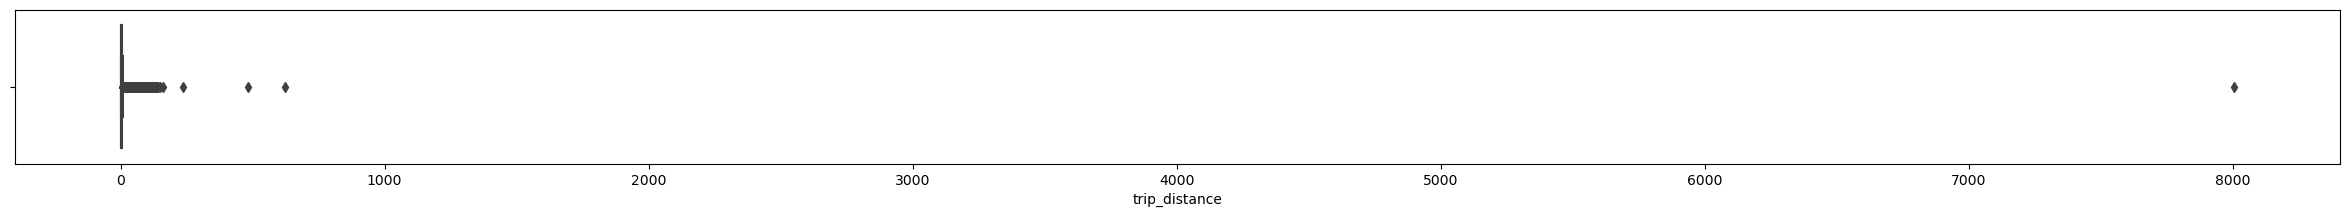

In [57]:
plt.figure(figsize=[30,2])
sns.boxplot(trips['trip_distance'])

In [58]:
print(f"There are {trips[trips['trip_distance']==0].shape[0]} records with Trip distance being zero.")

There are 103595 records with Trip distance being zero.


In [59]:
#Removing records in which trip distance is 0.
trip_Distance = trips.trip_distance[trips.trip_distance>0]
#Removing records in which trip distance is 3 standard deviations away from mean.

trip_Distance = trip_Distance[(trip_Distance-trip_Distance.median()).abs() < 4*trip_Distance.std()]

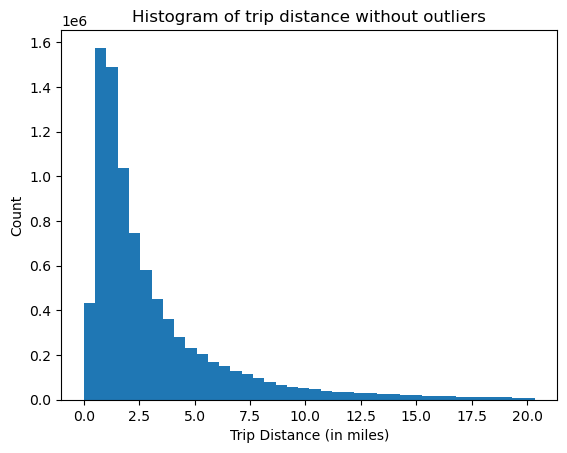

In [60]:
#Plotting histogram with 40 bins.
plt.hist(trip_Distance,bins = 40)
plt.title('Histogram of trip distance without outliers')
plt.xlabel('Trip Distance (in miles)')
plt.ylabel('Count')
plt.show()

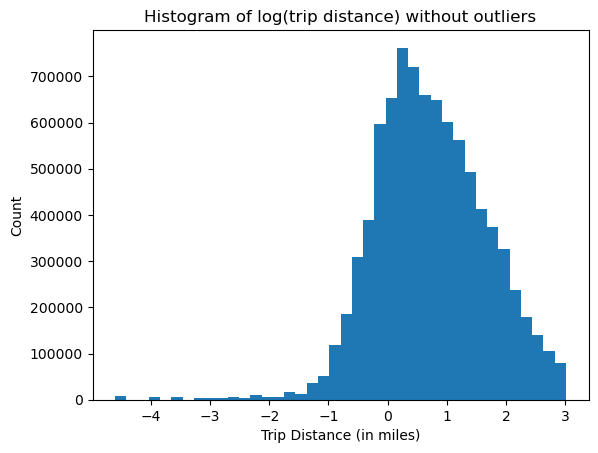

In [61]:
#Plotting histogram with 40 bins.
plt.hist(np.log(trip_Distance),bins = 40)
plt.title('Histogram of log(trip distance) without outliers')
plt.xlabel('Trip Distance (in miles)')
plt.ylabel('Count')
plt.show()

## Export CSV [DISABLED]

In [63]:
trips['passenger_count']

0          2.0
1          2.0
2          1.0
3          1.0
4          1.0
          ... 
8899713    1.0
8899714    1.0
8899715    1.0
8899716    1.0
8899717    1.0
Name: passenger_count, Length: 8899718, dtype: float64

In [62]:
#trips.to_csv('greeen_trip_2018_processed.csv')